In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/project/'

/content/drive/.shortcut-targets-by-id/1MG5qbQ0whefvbr056GUnZf-XfwttrcXj/project


In [3]:
import pandas as pd
import numpy as np

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [5]:
tokenizer=Tokenizer()

In [6]:

dt=pd.read_csv('csic_database.csv')

In [7]:
dt.columns

Index(['type', 'Method', 'User-Agent', 'Pragma', 'Cache-Control', 'Accept',
       'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL'],
      dtype='object')

In [8]:
dt.head()

,type,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [9]:
len(dt)

61065

In [10]:
# x=['method','accept','acceptEncoding','acceptLanguage','userAgent','url']
x=['Method','Accept','Accept-encoding','language','User-Agent','URL']


In [11]:
data=dt[x].astype(str)

In [12]:
x_data=[]

for s in data.values:
  d=""
  z=0
  for i in s:
    d+=x[z]+" : "+i+" \n"
    z+=1
  d=d.replace('HTTP/1.1 ',"")
  x_data.append(d)
  # print(s)

tokenizer.fit_on_texts(x_data)

In [13]:
vocab_size=len(tokenizer.word_counts)
print(vocab_size)

34593


In [14]:
print(*x_data[:5])

Method : GET 
Accept : text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5 
Accept-encoding : x-gzip, x-deflate, gzip, deflate 
language : en 
User-Agent : Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko) 
URL : http://localhost:8080/tienda1/index.jsp 
 Method : GET 
Accept : text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5 
Accept-encoding : x-gzip, x-deflate, gzip, deflate 
language : en 
User-Agent : Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko) 
URL : http://localhost:8080/tienda1/publico/anadir.jsp?id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito 
 Method : POST 
Accept : text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5 
Accept-encoding : x-gzip, x-deflate, gzip, deflate 
language : en 
User-Agent : Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Ge

In [15]:
data.head()

,Method,Accept,Accept-encoding,language,User-Agent,URL
0,GET,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate",en,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,GET,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate",en,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,http://localhost:8080/tienda1/publico/anadir.j...
2,POST,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate",en,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,http://localhost:8080/tienda1/publico/anadir.j...
3,GET,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate",en,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,http://localhost:8080/tienda1/publico/autentic...
4,POST,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate",en,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,http://localhost:8080/tienda1/publico/autentic...


## order Method + Accept + Accept-encoding + language + User-Agent+ URL


In [16]:
padded=tokenizer.texts_to_sequences(x_data)

In [17]:
len(padded[0])


58

In [18]:
padded=pad_sequences(padded)

In [19]:
input_len=padded.shape[1]
print(input_len,padded.shape)

211 (61065, 211)


In [20]:
padded=np.reshape(padded,(-1,padded.shape[1],1))

In [21]:
import tensorflow as tf

# Define the input shape
input_shape = (input_len,)

# Define the model architecture
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Embedding(vocab_size+1, 50, input_length=input_len)(inputs)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.Conv1D(filters=250, kernel_size=3, activation='relu', padding='valid')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(units=250, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
outputs = tf.keras.layers.Dense(units=2, activation='softmax')(x)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 211)]             0         
                                                                 
 embedding (Embedding)       (None, 211, 50)           1729700   
                                                                 
 dropout (Dropout)           (None, 211, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 209, 250)          37750     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                             

In [22]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


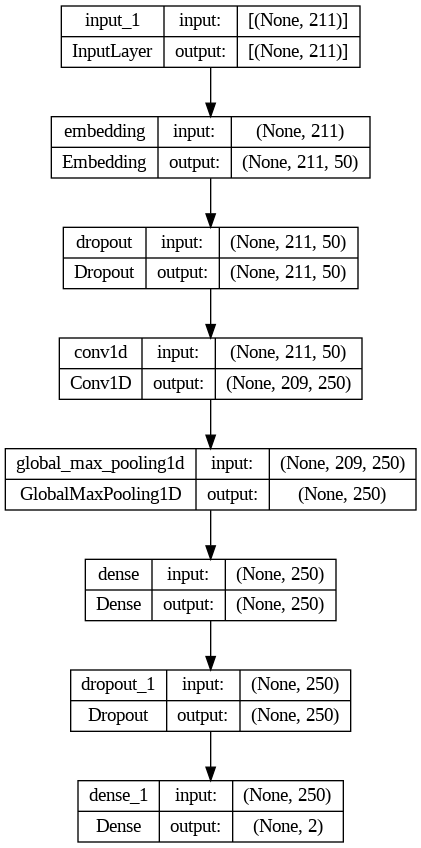

In [23]:
from tensorflow.keras.utils import plot_model


plot_model(model,show_shapes=True)

In [24]:
dt['type'].unique

<bound method Series.unique of 0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
61060    Anomalous
61061    Anomalous
61062    Anomalous
61063    Anomalous
61064    Anomalous
Name: type, Length: 61065, dtype: object>

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

en=LabelEncoder()
en.fit(dt['type'])
print('Normal',"value : ",en.transform(['Normal']))
print('Anomalous',"value : ",en.transform(['Anomalous']))
z=en.transform(dt['type'])

y=to_categorical(z)

Normal value :  [1]
Anomalous value :  [0]


In [26]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# normal =[0,1] and anomalous=[1,0]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.4, random_state=42,stratify=y,shuffle=True)
x_val,x_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42,stratify=y_test,shuffle=True)


In [28]:
epochs=50

In [29]:
his=model.fit(X_train,y_train,validation_data=(x_val,y_val),verbose=1,batch_size=1000,epochs=epochs)

Epoch 1/50
37/37 [==============================] - 12s 232ms/step - loss: 0.6427 - accuracy: 0.6068 - val_loss: 0.5268 - val_accuracy: 0.7115
Epoch 2/50
37/37 [==============================] - 6s 173ms/step - loss: 0.3773 - accuracy: 0.7875 - val_loss: 0.2573 - val_accuracy: 0.8506
Epoch 3/50
37/37 [==============================] - 7s 195ms/step - loss: 0.2452 - accuracy: 0.8524 - val_loss: 0.2422 - val_accuracy: 0.8556
Epoch 4/50
37/37 [==============================] - 6s 150ms/step - loss: 0.2247 - accuracy: 0.8622 - val_loss: 0.2475 - val_accuracy: 0.8278
Epoch 5/50
37/37 [==============================] - 7s 183ms/step - loss: 0.2188 - accuracy: 0.8615 - val_loss: 0.2414 - val_accuracy: 0.8570
Epoch 6/50
37/37 [==============================] - 5s 139ms/step - loss: 0.2160 - accuracy: 0.8627 - val_loss: 0.2381 - val_accuracy: 0.8585
Epoch 7/50
37/37 [==============================] - 7s 177ms/step - loss: 0.2144 - accuracy: 0.8649 - val_loss: 0.2439 - val_accuracy: 0.8652
Epoch

In [30]:
score=model.evaluate(x_test,y_test,verbose=1)

382/382 [==============================] - 2s 4ms/step - loss: 0.2866 - accuracy: 0.8503


In [31]:
import matplotlib.pyplot as plt

In [32]:
x=np.arange(1,epochs+1,1)

In [33]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

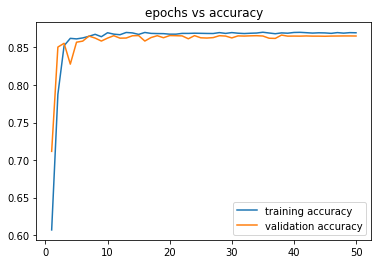

In [34]:
plt.plot(x,his.history['accuracy'],label='training accuracy')
plt.plot(x,his.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='best')
plt.title('epochs vs accuracy')
plt.savefig('accuracy_vs_epochs.jpg')
plt.show()

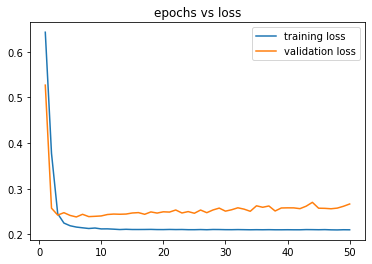

In [35]:
plt.plot(x,his.history['loss'],label='training loss')
plt.plot(x,his.history['val_loss'],label='validation loss')
plt.legend(loc='best')
plt.title('epochs vs loss')
plt.savefig('loss_vs_epochs.jpg')
plt.show()

In [36]:
import pickle

with open('model_pickle.pkl','wb') as f:
  pickle.dump(model,f)


with open('tokenizer.pkl','wb') as f:
  pickle.dump(tokenizer,f)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv1d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......embedding
.........vars
............0
......global_max_pooling1d
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-07 17:04:42     22002136
config.json                                    2023-03-07 17:0

In [37]:
labels=['Anamalous',"Normal"]
def get_label(y):
  return labels[np.argmax(y)]

In [38]:
y_pred=model.predict(x_test)
y_predicted=[get_label(x) for x in y_pred]
y_actual=[get_label(x) for x in y_test]

382/382 [==============================] - 1s 3ms/step


In [42]:
y_predicted[:5]

['Anamalous', 'Normal', 'Anamalous', 'Normal', 'Anamalous']

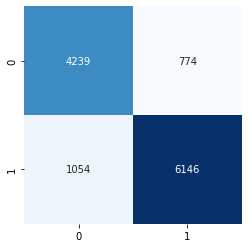

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_actual, y_predicted,labels=labels)
matrix=sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
matrix.figure.savefig('confusion_matrix.jpg')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_predicted))

              precision    recall  f1-score   support

   Anamalous       0.80      0.85      0.82      5013
      Normal       0.89      0.85      0.87      7200

    accuracy                           0.85     12213
   macro avg       0.84      0.85      0.85     12213
weighted avg       0.85      0.85      0.85     12213

